In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data4project.csv')
df = df.drop(columns = 'sqft')

In [3]:
correlations = df.corr()
correlations

,bedrooms,days_on_market,fireplace,price_sold,year,yearbuilt,zipcode,baths,latitude,longitude,school_dist
bedrooms,1.000000,0.020547,0.199659,0.541668,-0.004915,-0.008180,-0.006649,0.640243,0.058562,0.192768,0.110793
days_on_market,0.020547,1.000000,-0.023566,0.116844,0.072862,-0.000360,0.009938,0.053073,-0.013643,0.055138,-0.006678
fireplace,0.199659,-0.023566,1.000000,0.024452,-0.017023,-0.004896,0.001591,0.255842,-0.017917,-0.021216,0.024165
price_sold,0.541668,0.116844,0.024452,1.000000,-0.133926,0.017482,-0.000849,0.580634,0.114445,0.168025,0.075472
year,-0.004915,0.072862,-0.017023,-0.133926,1.000000,-0.022033,-0.013289,0.021940,-0.010824,0.026170,-0.025834
yearbuilt,-0.008180,-0.000360,-0.004896,0.017482,-0.022033,1.000000,0.001302,-0.008799,0.009140,0.008349,-0.011894
zipcode,-0.006649,0.009938,0.001591,-0.000849,-0.013289,0.001302,1.000000,-0.006507,0.006727,0.000744,-0.000482
baths,0.640243,0.053073,0.255842,0.580634,0.021940,-0.008799,-0.006507,1.000000,0.028498,0.111819,0.077697
latitude,0.058562,-0.013643,-0.017917,0.114445,-0.010824,0.009140,0.006727,0.028498,1.000000,0.214437,0.243227
longitude,0.192768,0.055138,-0.021216,0.168025,0.026170,0.008349,0.000744,0.111819,0.214437,1.000000,0.365009


Text(0.5, 1.05, 'Overall Correlation Matrix')

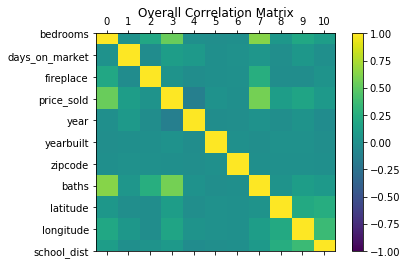

In [4]:
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations, vmin=-1, vmax = 1)
fig.colorbar(cax)
ticks=np.arange(0, 11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(correlations.columns)
ax.set_title('Overall Correlation Matrix')

Text(0.5, 1.05, '2-Bedroom Correlation Matrix')

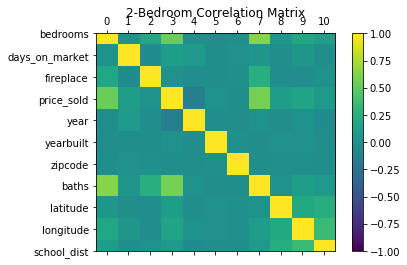

In [5]:
#We will now focus on properties with less than 3 bedrooms
two_bedrooms = df[df['bedrooms'] < 3]
correlations_two_bedrooms = two_bedrooms.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations, vmin=-1, vmax = 1)
fig.colorbar(cax)
ticks=np.arange(0, 11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(correlations.columns)
ax.set_title('2-Bedroom Correlation Matrix')

Text(0.5, 1.0, 'Density Functions Per Variable')

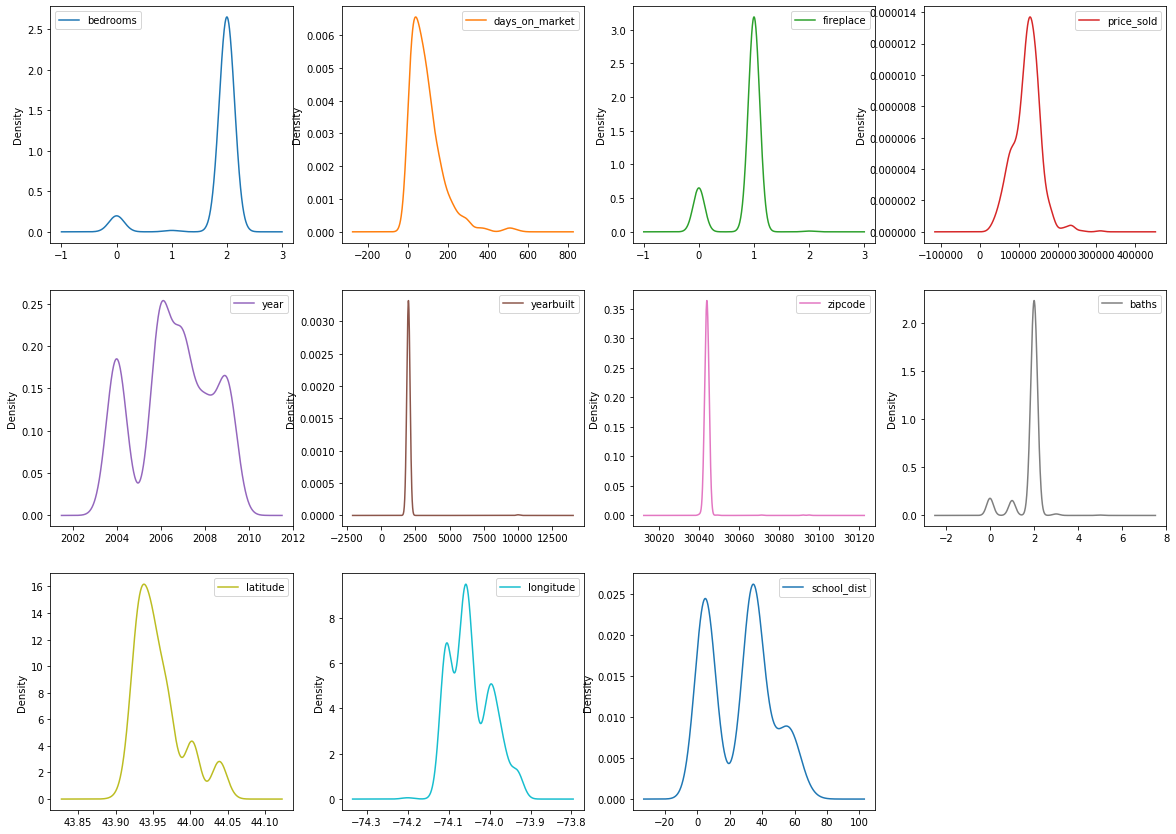

In [6]:
two_bedrooms.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(20,20))
plt.title('Density Functions Per Variable')

Text(0.5, 1.0, 'Price Sold per Days-on-Market, Segmented by School District')

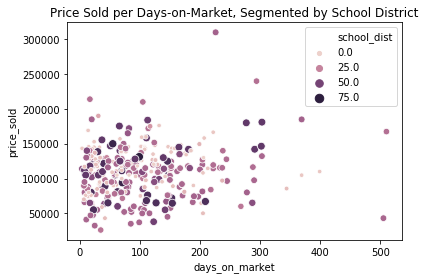

In [7]:
sns.scatterplot(x=two_bedrooms['days_on_market'], y=two_bedrooms['price_sold'], hue = two_bedrooms['school_dist'], size = two_bedrooms['school_dist'])
plt.title('Price Sold per Days-on-Market, Segmented by School District')

Text(0.5, 1.0, 'Variable Distribution')

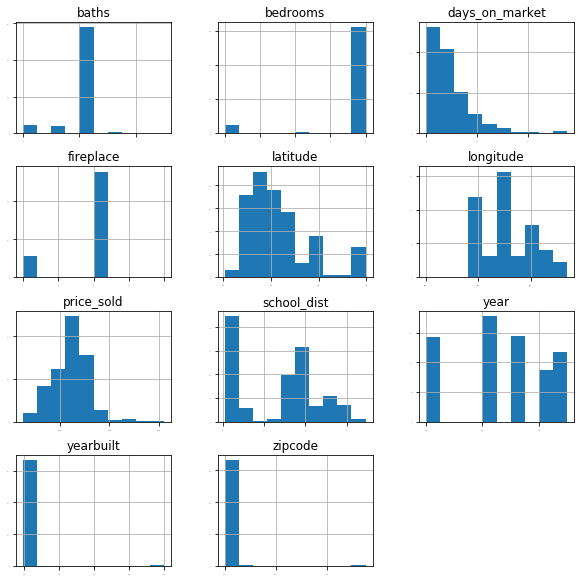

In [8]:
two_bedrooms.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(10,10))
plt.title('Variable Distribution')

Text(0.5, 1.0, 'Price Distribution - (units with less than 3 bedrooms)')

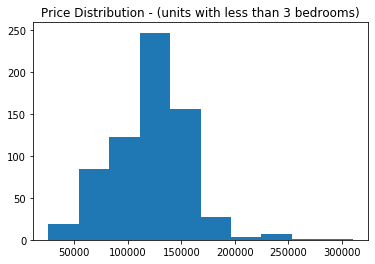

In [9]:
plt.hist(two_bedrooms['price_sold'])
plt.title('Price Distribution - (units with less than 3 bedrooms)')

Text(0.5, 1.0, 'Days-on-Market Distributon - (units with less than 3 bedrooms)')

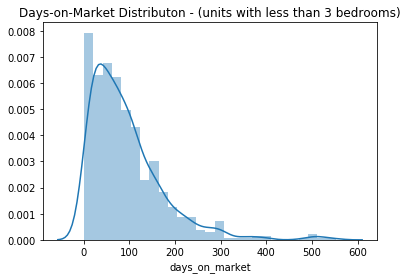

In [10]:
sns.distplot(two_bedrooms['days_on_market'])
plt.title('Days-on-Market Distributon - (units with less than 3 bedrooms)')

Text(0.5, 1.0, 'Average Price per Zipcode')

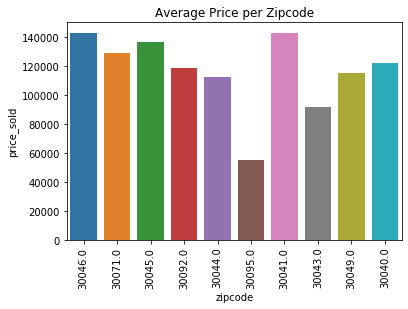

In [11]:
per_zipcode = two_bedrooms.groupby('zipcode').mean().reset_index()
per_zipcode = per_zipcode.sort_values('price_sold', ascending = True)
fig, ax = plt.subplots()
sns.barplot(x = 'zipcode', y = 'price_sold', data = per_zipcode, capsize = 0.2, ci = 'sk')
ax.set_xticklabels(per_zipcode['zipcode'], rotation=90)
ax.set_title('Average Price per Zipcode')

In [14]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

Text(0, 0.5, 'Coefficients')

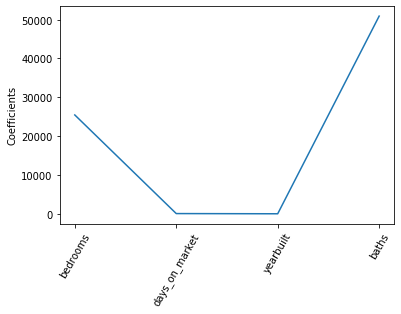

In [15]:
X = df[['bedrooms', 'days_on_market', 'yearbuilt', 'baths', 'school_dist']]
y = df[['price_sold']]
X.isna().sum()
X1 = X.dropna()
X1.isna().sum()
testdropna = df.dropna()
X2 = testdropna[['bedrooms', 'days_on_market', 'yearbuilt', 'baths']]
y2 = testdropna[['price_sold']]
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize = True)
names = X2.columns
lasso_coef = lasso.fit(X2, y2).coef_
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation = 60)
plt.ylabel('Coefficients')

In [16]:
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.42393006302655556

In [ ]:
#Issues with this model should include lack of property size and a one-fits all approach to creating the regression
#Next steps should include narrowing down the properties into smaller data sets filtering by bedroom and/or bath ranges
#Below we'll fit the data to different statistical models to estimate property value

In [17]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [18]:
model_1 = Lasso()
model_2 = Ridge()
model_3 = DecisionTreeRegressor()
model_4 = RandomForestRegressor(random_state=0)

models = [model_1, model_2, model_3, model_4]

def score_model(model, X_t = X_train, X_v = X_test, y_t = y_train, y_v = y_test):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_test, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print('Model %d MAE: %d' % (i+1, mae))

Model 1 MAE: 34139
Model 2 MAE: 34136
Model 3 MAE: 43196
Model 4 MAE: 36279


C:\Users\14168\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\14168\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


C:\Users\14168\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


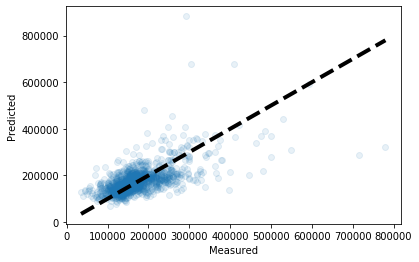

In [19]:
from sklearn.model_selection import cross_val_predict

model_4.fit(X_train, y_train)
predictions = model_4.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, predictions, alpha = 0.1)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [20]:
model_2.fit(X_train, y_train)
predictions = model_2.predict(X_test)
coefficients = pd.DataFrame(model_2.coef_)
labels = pd.DataFrame(X_train.columns)
coeff_list = coefficients.transpose(copy=True)
pd.concat([labels, coeff_list], axis=1)

,0,0
0,bedrooms,25256.595081
1,days_on_market,54.674018
2,yearbuilt,0.942079
3,baths,51746.106342
